# Data Cleaning
This notebook includes analysis with regards to the data cleaning step that is taken for the earthquake damage dataset.

In [1]:
# enables referencing modules in repository
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from src.features import build_features
# from src.data import make_dataset 
# commented out because: there seems to be an issue at the moment with the initial method from make_dataset
from src.models import train_model
from src.models import predict_model
from src.visualization import visualize

In [2]:
# Loading the data
train_df = pd.read_csv('../data/raw/train_values.csv')

## Finding Outliers in the dataset
---

1. `building_id` seems to be used to identify each unique building.
2. `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` these features seem to describe the location the building is located in.
3. `count_floors_pre_eq` seems to be the number of floors the building had before the earthquake happend
4. `age` seems to be the age of the building before it was destroyed
5. `area_percentage` maybe the amount of buildings in an area 
6. `height_percentage` likely the height of the building before it was destroyed
7. `land_surface_condition` likely the condition the surface of the ground of the building had before the earthquake
8. `foundation_type` as the name suggests this seems to be the type of the foundation the building was built 
9. `roof_type`, `ground_floor_type`, `other_floor_type` as the name suggest this seems to be the type of the roof and floors the building had. It seems like only to types of floors where recorded
10. `position` (unkown)
11. `plan_configuration` likely class of building structure
12. `has_superstructure..` likely a one hot encoded feature that represents the type of used superstructure
13. `legal_ownership_status` likely who the building belongs to
14. `count_families` seems to be the amount of families that lived in the building
15. `has_secondary_use..` seems to describe whether the building had an additional purpose than living in it


## 1. Analysis for `building_id`
This feature describes the unique id for each building. For this reason it provides no further information for the predicion model.

## 2. Analysis for `geo_level_1_id`

As the distribution below is showing

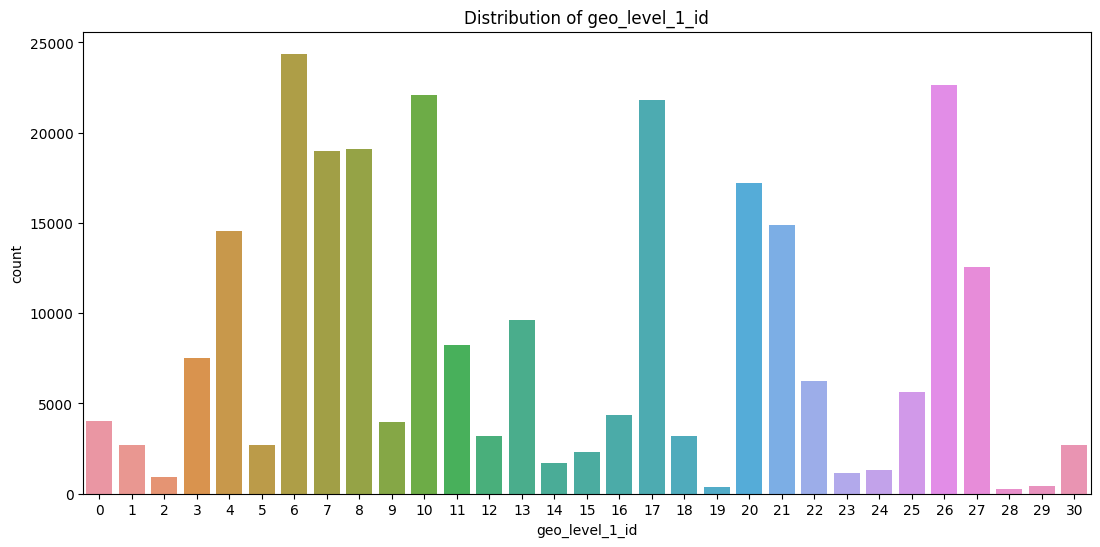

In [12]:
plt.figure(figsize=(13,6))
sns.countplot(data=train_df, x='geo_level_1_id')
plt.title("Distribution of geo_level_1_id")
plt.show()

In [13]:
#outliers = build_features.find_outliers_IQR(train_df.select_dtypes(include='number'))
outliers = build_features.find_outliers_IQR(train_df['geo_level_1_id'])

print('number of outliers: ' + str(len(outliers)))

print('max outlier value: ' + str(outliers.max()))

print('min outlier value: ' + str(outliers.min()))


number of outliers: 0
max outlier value: nan
min outlier value: nan


-------------

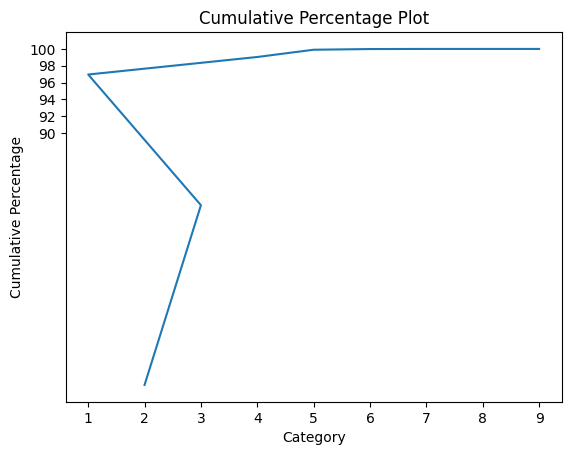

In [ ]:
cumulative_sum = train_df['count_floors_pre_eq'].value_counts().sort_values(ascending=False).cumsum()

cumulative_percentage = 100 * cumulative_sum / cumulative_sum.max()

# plot the cumulative percentage
plt.plot(cumulative_percentage.index, cumulative_percentage)

# set the plot title and axis labels
plt.title('Cumulative Percentage Plot')
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
yticks = np.arange(90, 102,2)
ylabels = [f"{y:.0f}%" for y in yticks]
plt.yticks(yticks)
# show the plot
plt.show()